In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import numpy as np

In [28]:
data_size = 500

In [32]:
data = np.stack((np.arange(data_size), np.arange(data_size)), axis=-1).astype(np.float64)
data[:10]

array([[ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  2.],
       [ 3.,  3.],
       [ 4.,  4.],
       [ 5.,  5.],
       [ 6.,  6.],
       [ 7.,  7.],
       [ 8.,  8.],
       [ 9.,  9.]])

In [39]:
noise = np.random.rand(data_size, 2)
noise[:,0] *= np.random.randint(200, size=data_size)
noise[:,1] *= np.random.randint(200, size=data_size)
data += noise
data[:10]

array([[ 138.05389831,  137.49626617],
       [ 183.57598399,  110.87373582],
       [ 212.04145891,   34.44531763],
       [  30.50716832,   47.72576166],
       [  74.63708021,   87.2869724 ],
       [ 109.11319878,   13.6189107 ],
       [ 225.14971342,   36.87285275],
       [ 173.0146059 ,   75.25867901],
       [  89.8512096 ,  111.14269276],
       [  37.49537411,  178.56710891]])

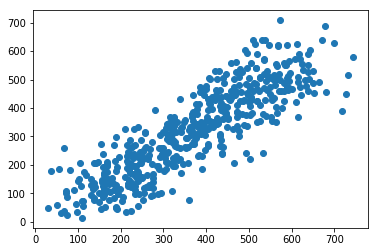

In [40]:
plt.scatter(data[:,0], data[:,1])
plt.show()

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = np.asarray(train_test_split(data[:,0], data[:,1], test_size=0.1))

In [50]:
y_test.shape

(50,)

In [52]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
print('Score: ', reg.score(x_test.reshape(-1,1), y_test.reshape(-1,1)))

Score:  0.714410578289


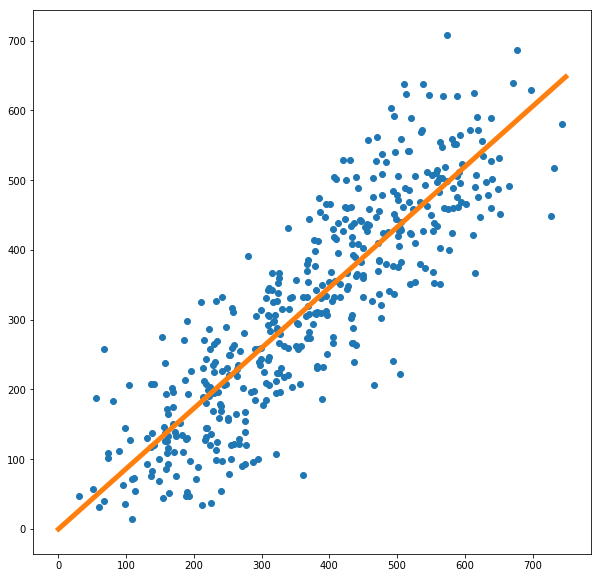

In [63]:
x_line = np.arange(0, 750).reshape(-1,1)
plt.figure(figsize=(10,10))
plt.scatter(x_train, y_train)
plt.plot(x_line, reg.predict(x_line), color='C1', linewidth=5.0)
plt.show()